In [1]:
###           Written and Executed By:            ####
###               Sheekar Banerjee                ####
###        Senior Software Engineer- AI & ML      ####

# Breast Cancer Detection
# Ultrasound Image
# Fast AI- Pytorch
# ResNet50

!pip install fastai --upgrade
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 9.2 MB/s 
     |████████████████████████████████| 60 kB 8.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.0 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
     |████████████████████████████████| 561 kB 52.6 MB/s 
     |████████████████████████████████| 133 kB 58.2 MB/s 
     |████████████████████████████████| 132 kB 61.5 MB/s 
     |████████████████████████████████| 106 kB 71.8 MB/s 
     |████████████████████████████████| 428 kB 60.5 MB/s 
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstalling traitlets-5.1.1:
      Successfu

In [2]:
from fastai.vision.all import *

In [3]:
path = "/content/drive/MyDrive/breast ultra"
size = 224
bs = 64

In [4]:
data = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                get_y=parent_label,
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

In [5]:
dls = data.dataloaders(path,bs=64)

['benign', 'malignant', 'normal']

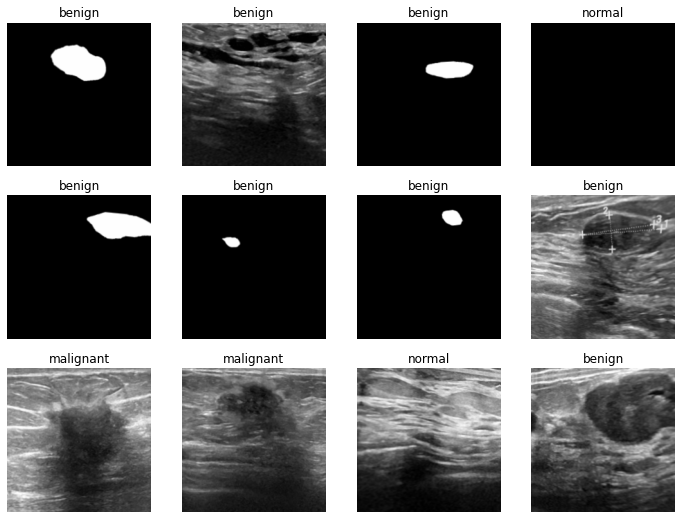

In [6]:
dls.show_batch(max_n=12,nrows=3)
dls.vocab

In [7]:
learn = vision_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.100547,0.500650,0.834921,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.712633,0.535375,0.777778,00:20
1,0.624249,0.304332,0.888889,00:19
2,0.552219,0.214185,0.926984,00:19
3,0.498351,0.387115,0.898413,00:19
4,0.443167,0.380512,0.885714,00:19
5,0.373106,0.276538,0.901587,00:19
6,0.321737,0.219927,0.923810,00:19
7,0.272852,0.245423,0.926984,00:19
8,0.240605,0.205807,0.926984,00:21
9,0.213050,0.209881,0.926984,00:23


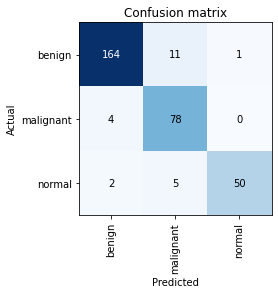

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

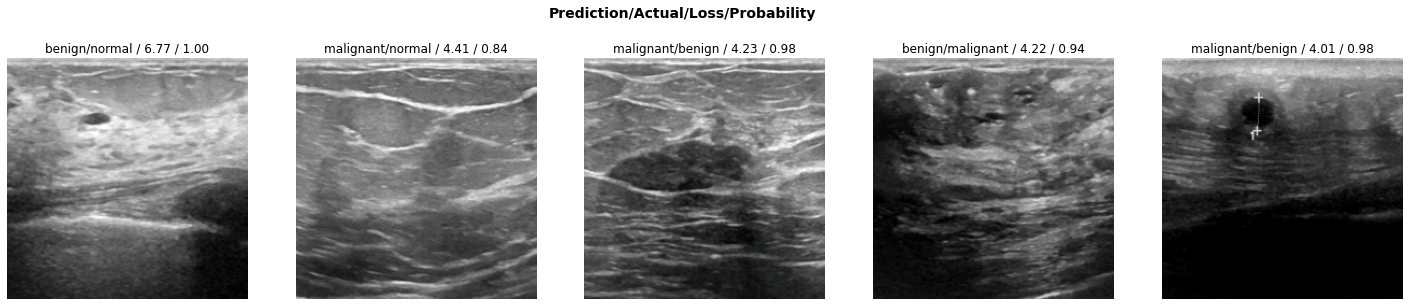

In [9]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [10]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [11]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [12]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [13]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])

In [14]:
learn.predict("/content/drive/MyDrive/breast ultra/malignant/malignant (104).png")

('malignant', TensorBase(1), TensorBase([2.3265e-04, 9.9972e-01, 4.9938e-05]))